In [2]:
## Requirements
!pip3 install fsspec
!pip3 install gcsfs
!pip install --q vectice[github]==22.3.5.1


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.2/167.2 kB 2.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.2/141.2 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 2.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 1.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 2.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.5.0
    Uninstalling fsspec-2022.5.0:
      Successfully uninstalled fsspec-2022.5.0
ERROR: pip's dependen

In [3]:
!pip3 show vectice

Name: vectice
Version: 22.3.5.1
Summary: Vectice Python library
Home-page: https://www.vectice.com
Author: Vectice Inc.
Author-email: sdk@vectice.com
License: Apache License 2.0
Location: /opt/conda/lib/python3.7/site-packages
Requires: python-dotenv, requests, urllib3
Required-by: 


# Data Retrieval

The original was downloaded from the `House Sales in King County, USA`: https://www.kaggle.com/harlfoxem/housesalesprediction

Let's imagine in this demo that we are going to access the data from a Google Cloud Storage bucket, where our finance expert has uploaded all the relevant files and published it into Vectice data catalog.

Description of features below. Vectice UI has also the list of features in the Data Catalog.

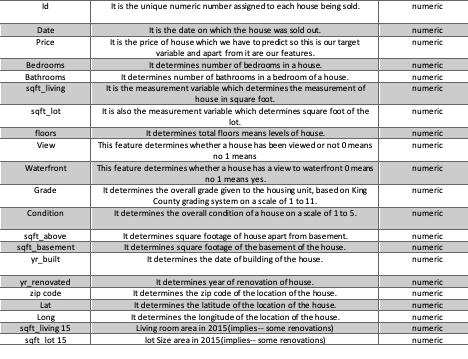

### Retrieve the data from GCS

In [ ]:
# Load your json key file to access GCS that was provided with your tutorial account. 
# The name should be something like gridmauk-10b1aaafb63f.json.
from google.colab import files
uploaded = files.upload()

In [ ]:
# Once your file is loaded set the credentials for GCS and load the file
# in a pandas frame, double check the json file name you uploaded below.
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'gcsTutorialTest.json'

# The original source dataset is already declared in the Vectice UI as "kc_house_data",
# and its connection to "gs://vectice_data_examples/reference_data/" has been established.
df = pd.read_csv('gs://vectice_tutorial/kc_house_data.csv')

# Run head to make sure the data was loaded properly
df.head()


In [ ]:
# In order to use Vectice SDK, let's set up the configurations first.
# The Vectice API key below can be generated from the UI.
# For better security, we strongly recommend for the settings to be put into a dedicated file and not to be added directly.
os.environ['VECTICE_API_ENDPOINT']= "be-dev.vectice.com"
#os.environ['VECTICE_API_TOKEN'] = "APITOKEN_APITOKEN"
os.environ['VECTICE_API_TOKEN'] = "wz1pa0y0Z.2xQ7rgbPO3Gdm4qLNRkWwz1pa0y0ZoX6V5BK82aM9DjnlJEYem"

from vectice import Vectice

#vectice = Vectice(project_token="PROJECTTOKEN_PROJECTTOKEN")
vectice = Vectice(project_token="nwlOqv91Hgn9JaGve863")


In [ ]:
# Here, we create a new version of the source dataset. This is only needed if the data has changed.
# Warning: The dataset may already exist in the UI (simple), or you may create it here through the SDK (more complex since you need its "digest").
# For this example, this dataset will be created on the UI.
ds_version = vectice.create_dataset_version().with_parent_name("kc_house_data")

# Start a run to track this data cleaning job
# It will specify the dataset version we just created as the run's input.
# We are also supporting more convenient auto-versioning.
vectice.create_run("jobCleanHousingData")
vectice.start_run(inputs=[ds_version])


In [ ]:
# Here, we show you for reference how to create a dataset with a dataset version including a declared csv as resource 
ds_raw = vectice._client.create_dataset({"name": "kc_house_data_sdk", "connectionId": 478, "dataResources": [
  {
    "name": "kc_house_data.csv",
    "description": "",
    "path": {
      "id": "kc_house_data.csv",
      "isFolder": False,
      "path": "vectice_tutorial/kc_house_data.csv",
      "parentId": "vectice_tutorial",
      "type": "File",
      "uniqueId": "vectice_tutorial/kc_house_data.csv/1624626508521594",
      "uri": "gs://vectice_tutorial/kc_house_data.csv"
    },
    "schema": {
      "type": "File",
      "name": "kc_house_data.csv",
      "description": None,
      "fileFormat": "text/csv",
      "collate": None
    }
  }
]})

### Simple verification of the data

The data set should contain 21613 rows and 21 columns

In [ ]:
# How many rows do we have in this dataset?
print("Number of rows:", len(df))
print("\n")

# Inspecting type
print(df.dtypes)
print("\n")

# Check to see if there are any null values
print("Are there any null values?")
print("\n")
print(df.isnull().any())


We have 21613 rows in the dataset. We can drop 'id' and 'date' column since they are features that are not of that much use to us. There are no null values.


## Exploratory Data Analysis

In [ ]:
# Dropping the id and date columns, as well as the useless first column
df = df.drop(['Unnamed: 0','id', 'date'], axis=1)

# The view column may not be relevant for the business also. We will have to ask more questions.

In [ ]:
# Most of the data in the dataset is below $2,000,000 so we should drop this data as we can't predict accurately
print("Number of houses over $2M:", len(df[df['price'] > 2000000]))

# Let's retrict the data to below $2M and create a copy
df_2k = df[df['price'] <= 2000000]
df_2k = df_2k.copy()

print("Dataset shape after removing those houses over $2M:")
df_2k.shape


In [ ]:
plt.hist(df_2k['price'], edgecolor='black', linewidth=1.2)
plt.title("Price Distribution for housing below $2,000,000")
plt.xlabel("Price")
plt.ylabel("Number of houses")

plt.show()

# We will also support adding attachments, for example the diagram below, as part of the dataset version input for this one in the future.

In [ ]:
sns.set(rc={'figure.figsize': (15, 15)})
fig=plt.figure()

ax1=fig.add_subplot(4, 3, 1)
sns.boxplot(y=df_2k['price'], ax=ax1, width=0.3, color='turquoise')
ax1.set_title('Price of the houses')

ax2=fig.add_subplot(4, 3, 2)
sns.boxplot(y=df_2k['bedrooms'], ax=ax2, width=0.3, color='royalblue')
ax2.set_title('Number of bedrooms')

ax3=fig.add_subplot(4, 3, 3)
sns.boxplot(y=df_2k['bathrooms'], ax=ax3, width=0.3, color='cyan')
ax3.set_title('Number of bathrooms')

ax4=fig.add_subplot(4, 3, 4)
sns.boxplot(y=df_2k['floors'], ax=ax4, width=0.3, color='gold')
ax4.set_title('Number of floors')

ax5=fig.add_subplot(4, 3, 5)
sns.boxplot(y=df_2k['view'], ax=ax5, width=0.3, color='plum')
ax5.set_title('Number of times viewed')

ax6=fig.add_subplot(4, 3, 6)
sns.boxplot(y=df_2k['sqft_above'], ax=ax6, width=0.3, color='red')
ax6.set_title('Square footage of house apart from basement')

ax7=fig.add_subplot(4, 3, 7)
sns.boxplot(y=df_2k['sqft_basement'], ax=ax7, width=0.3, color='indigo')
ax7.set_title('Square footage of basement')

ax8=fig.add_subplot(4, 3, 8)
sns.boxplot(y=df_2k['sqft_living15'], ax=ax8, width=0.3, color='salmon')
ax8.set_title('Living room area')

ax9=fig.add_subplot(4, 3, 9)
sns.boxplot(y=df_2k['sqft_lot15'], ax=ax9, width=0.3, color='silver')
ax9.set_title('Lot size area')

plt.tight_layout(pad=0.05)
plt.show()


In [ ]:
# Number of bedrooms is changed from 33 to 3
df_2k.loc[df_2k['bedrooms'] == 33, 'bedrooms'] = 3
df_2k


In [ ]:
sns.set(rc={'figure.figsize': (15, 15)})
fig=plt.figure()

ax2=fig.add_subplot(4, 3, 2)
sns.boxplot(y=df_2k['bedrooms'], ax=ax2, width=0.3, color='royalblue')
ax2.set_title('Number of bedrooms')

plt.show()


In [ ]:
# Removing rows with zero bedrooms or bathrooms
indices = df_2k.loc[(df_2k['bedrooms']==0) | (df_2k['bathrooms']==0), ['bedrooms', 'bathrooms', 'floors', 'price']].index
df_2k.drop(labels=indices, axis=0, inplace=True)

In [ ]:
fig1=plt.figure()
fig1.tight_layout(pad=0.05)

sns.set(rc={'figure.figsize': (15, 33)})

ax01=fig1.add_subplot(5, 2, 1)
sns.regplot(x='bedrooms', y='price', data=df, fit_reg=False, ax=ax01, color='turquoise')
ax01.set_title('Number of bedrooms vs Price')

ax11=fig1.add_subplot(5, 2, 2)
sns.regplot(x='bathrooms', y='price', data=df, fit_reg=False, ax=ax11, color='royalblue')
ax11.set_title('Number of bathrooms vs Price')

ax21=fig1.add_subplot(5, 2, 3)
sns.regplot(x='floors', y='price', data=df, fit_reg=False, ax=ax21, color='rebeccapurple')
ax21.set_xticks([1, 2, 3])
ax21.set_title('Number of floors vs Price')

ax31=fig1.add_subplot(5, 2, 4)
sns.regplot(x='view', y='price', data=df, fit_reg=False, ax=ax31, color='orangered')
ax31.set_xticks([0, 1, 2, 3, 4])
ax31.set_title('Number of times viewed vs Price')

ax41=fig1.add_subplot(5, 2, 5)
sns.regplot(x='sqft_above', y='price', data=df, fit_reg=False, ax=ax41, color='plum')
ax41.set_title('Square footage of house apart from basement vs Price')

ax51=fig1.add_subplot(5, 2, 6)
sns.regplot(x='sqft_basement', y='price', data=df, fit_reg=False, ax=ax51, color='darkorange')
ax51.set_title('Square footage of basement vs Price')

ax61=fig1.add_subplot(5, 2, 7)
sns.regplot(x='sqft_living15', y='price', data=df, fit_reg=False, ax=ax61, color='indigo')
ax61.set_title('Living room area vs Price')

ax71=fig1.add_subplot(5, 2, 8)
sns.regplot(x='sqft_lot15', y='price', data=df, fit_reg=False, ax=ax71, color='salmon')
ax71.set_title('Lot size area vs Price')

plt.tight_layout(pad=0.05)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, top=0.8)

ax2 = plt.subplot(221)
ax2 = sns.countplot(x="grade", data=df_2k, ax=ax2)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("Grade distribution price", fontsize=15)
ax2.set_xlabel("Grade number")
ax2.set_ylabel("log Price(US)")

ax0 = plt.subplot(212)
ax0 = sns.regplot(x="grade", y="price", data=df_2k, x_jitter=True)

ax0.set_title("Better understaning price by grade", fontsize=15)
ax0.set_xlabel("Grade")
ax0.set_ylabel("log Price(US)")
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)

plt.show()


In [ ]:
# Store the cleaned data in a different CSV
df_updated = df_2k.copy()
df_updated.to_csv(r'gs://vectice_tutorial/kc_house_data_cleaned.csv', index=False, header=True)
df_updated


In [ ]:
# Create a new version of the cleaned_kc_house_data dataset if needed
# Here, we declare this part after the writing by Pandas intentionally to show you the autoversion, since the file has changed
output_ds_version = vectice.create_dataset_version().with_parent_name("cleaned_kc_house_data")

# End the run and save the new dataset version.
# Set the cleaned_kc_house_data as an output.
vectice.end_run(outputs=[output_ds_version])


## Conclusion

This completes the EDA section of the tutorial. Vectice makes it easy to keep track of the data that was used in the EDA and document the finding in the corresponding Vectice project.

Upon completion in order to track your notebook, you have 3 options: 

1.   You can upload the  notebook directly in the Vectice storage
2.   You can add it to the GCS bucket and include it in the dataset so it can be reused for other type of projects in the future
3.   You can sync up your notebook with Github and we will grab it from there (coming soon)

Let us know what is your favorite option or if you would like to see other mechanisms to sync up notebooks and analysis for the EDA phase.
